# Visualization in Python: matplotlib and pandas



## Short Intro into Pandas

Pandas is the easiest way to work with data sets in Python.  It has built in support for visualization, and it works with matplotlib.  So first, a short introduction to pandas.

In [125]:
from pandas import DataFrame, read_csv
import pandas as pd

Manually create a data set

In [126]:
# standard Python lists
names = ['Bob','Jessica','Mary','John','Mel','Gary','Steve','Ellie','Nora','David','Fran','Gus','Pete']
births = [968, 155, 77, 578, 973, 539,225,179,839,401,199,88,472]

BabyDataSet = list(zip(names,births)) # zip pairs entries together and list combines the entries to a list

print(BabyDataSet)

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973), ('Gary', 539), ('Steve', 225), ('Ellie', 179), ('Nora', 839), ('David', 401), ('Fran', 199), ('Gus', 88), ('Pete', 472)]


Turn it into a pandas data frame.  The DataFrame class of pandas reorganizes the list into a tabular pandas object similar to an sql table or an excel spreadsheet. 

In [127]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973
5,Gary,539
6,Steve,225
7,Ellie,179
8,Nora,839
9,David,401


We can use pandas to read and write data sets

In [128]:
#We can now save the content as a standard tabular data format (csv)
df.to_csv('births1880.csv',index=False,header=False)

#We can also read back from the same file into a panda object
df = pd.read_csv(r'births1880.csv')

df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973
4,Gary,539
5,Steve,225
6,Ellie,179
7,Nora,839
8,David,401
9,Fran,199


Wrong header.  `read_csv` treated the first record as the header; set the header to null.

In [129]:
df = pd.read_csv(r'births1880.csv',header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973
5,Gary,539
6,Steve,225
7,Ellie,179
8,Nora,839
9,David,401


Now we have the right data but no header.  Label the headers.  

In [130]:
df = pd.read_csv(r'births1880.csv', names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973
5,Gary,539
6,Steve,225
7,Ellie,179
8,Nora,839
9,David,401


Just look at the first observation; the 1 in the call to `head` specifies the number of rows.  Then look dimensions, and do some subsetting.

In [131]:
df.head(1)

,Names,Births
0,Bob,968


In [132]:
df.shape # dimensions (rows and columns)

(13, 2)

In [133]:
df.columns # names of columns

Index(['Names', 'Births'], dtype='object')

In [134]:
df[5:8] # range of rows

,Names,Births
5,Gary,539
6,Steve,225
7,Ellie,179


In [135]:
df.iloc[3] # single row

Names     John
Births     578
Name: 3, dtype: object

In [136]:
df[df['Births'] > 300] # selecting rows meeting a condition

,Names,Births
0,Bob,968
3,John,578
4,Mel,973
5,Gary,539
8,Nora,839
9,David,401
12,Pete,472


In [137]:
df.describe()

,Births
count,13.000000
mean,437.923077
std,324.388261
min,77.000000
25%,179.000000
50%,401.000000
75%,578.000000
max,973.000000


In [138]:
df[df['Births'] > 100].describe()

,Births
count,11.000000
mean,502.545455
std,310.497138
min,155.000000
25%,212.000000
50%,472.000000
75%,708.500000
max,973.000000


Create a new variable (or replace the values of an existing one)

In [139]:
df['gender']=['m','f','f','m','m','m','m','f','f','m','f','m','m']
df

,Names,Births,gender
0,Bob,968,m
1,Jessica,155,f
2,Mary,77,f
3,John,578,m
4,Mel,973,m
5,Gary,539,m
6,Steve,225,m
7,Ellie,179,f
8,Nora,839,f
9,David,401,m


Sort the data frame

In [140]:
df.sort_values(['Births'], ascending=False)

,Names,Births,gender
4,Mel,973,m
0,Bob,968,m
8,Nora,839,f
3,John,578,m
5,Gary,539,m
12,Pete,472,m
9,David,401,m
6,Steve,225,m
10,Fran,199,f
7,Ellie,179,f


Compute values on columns

In [141]:
df['Births'].max()

973

In [142]:
df['Births'].min()

77

In [143]:
df['Births'].median()

401.0

In [144]:
print('Number of male names', len(df[df['gender'] == 'm']))

Number of male names 8


In [145]:
dfm=df['gender'] == 'm'
print("Total births with male names", df['Births'][dfm].sum())

Total births with male names 4244


In [146]:
dff=df['gender'] == 'f'
print("Total births with female names", df['Births'][dfm].sum())

Total births with female names 4244


 We can create another dataframe that references columns by the Names rather than the index

In [147]:
df_indexed = df.set_index('Names')
df_indexed

,Births,gender
Names,,
Bob,968,m
Jessica,155,f
Mary,77,f
John,578,m
Mel,973,m
Gary,539,m
Steve,225,m
Ellie,179,f
Nora,839,f


In [148]:
import matplotlib.pyplot as plt
from matplotlib import cm

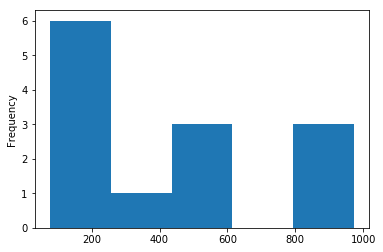

In [166]:
df['Births'].plot.hist(bins=5)
plt.show()

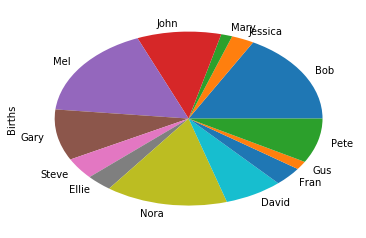

In [167]:
df_indexed['Births'].plot.pie(y=None)
plt.show()

## Pandas DataFrame documentation in  
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html